# Assignment -- 1

## Part 2 (13+3 pt.): Free range practical classification

In this assignment you are asked to apply different classifiers to the dataset:

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

X_full, y_full = make_classification(n_samples=2400, n_features=20, n_informative=18,
                                     n_redundant=0, n_classes=2, random_state=2319)

print(X_full.shape, y_full.shape)

(2400, 20) (2400,)


You are asked to play around with these binary classification models from
the third lecture:
* logistic regression
* $k$-nearest neighbours
* Decision Tree

and check out different calssification quality measures.

You are free to use **sklearn**, **pandas**, **numpy** or any other library to the
fullest. Try to avoid writing code, and instead rely on the already implemented and
validated solutions.

Your goal is to **explore and experiment** with the dataset using these models.

### Make train / test split (2 pts.)

This step is just it: split the sample $(X, y)$ into a **train** and **test**
sample. The trick is to make the split arbitrarily random, yet **replayable**,
i.e. each separate run of your notebook **must yield exactly the same results**.

In [3]:
import sklearn.model_selection as sksel
import sklearn.linear_model as sklin
import sklearn.tree as sktree
import sklearn.neighbors as skneighb

In [4]:
X_tr, X_test, y_tr, y_test = sksel.train_test_split(X_full, y_full, test_size = 0.35, random_state=5)

### Model selection (7+3 pt.)

In this step you are asked to perform hyperparameter selection with $k$-fold cross
validation on the **training sample**.

Again, make sure that the folds are generated randomly, yet **replayable** as in the previous step.

Tutorial on cross validation in [sklearn](http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

Basically you need to:
1. Select a range of the hyperparameter you are tuning:
    * penalty type, regularization coefficient for Logistic Regression;
    * Tree depth, number of features per split for Decision Trees;
    * the number of neighbours in $k$-NN, etc.
2. Pick a metric to evaluate with (Accuracy, precision, recall, $F_1$, or custom etc.)
3. Search for the best parameter using cross-validation and save the best model
4. rinse and repeat for another model / parameter settings.

You get extra points if you tune more than one hyperparameter.
To do this you will have to decide either
* to test all possible combinations of parameters
* or to employ a greedy optimization strategy

In [13]:
# We tune various hyperparameters in order to maximize f-measure of the classifier

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#Tune regularization parameter C

Cs = np.linspace(1e-3,10,100)
logRegs = [sklin.LogisticRegression(C=c) for c in Cs]
logRegs = [logReg.fit(X_tr,y_tr) for logReg in logRegs]

scores = [np.mean(cross_val_score(logReg, X_tr, y_tr, cv=10, scoring="f1")) for logReg in logRegs]

logReg_bestId = np.argmax(scores)


Text(0,0.5,'K-Fold Score')

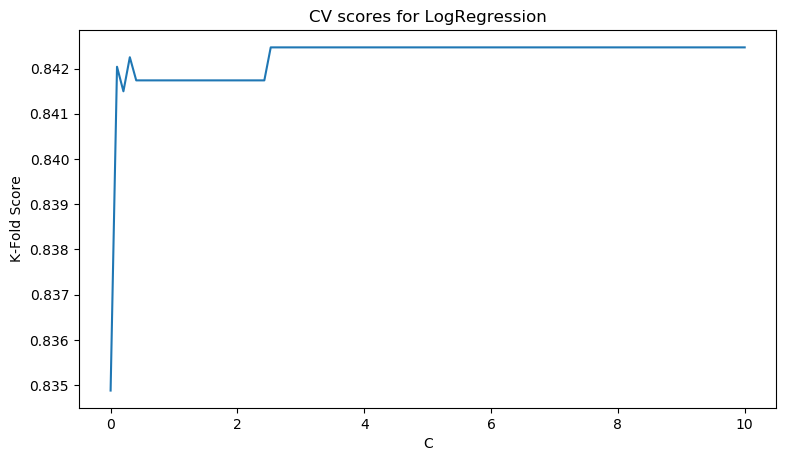

In [21]:
f,ax = plt.subplots(figsize=(9,5))

ax.plot(Cs, scores)
ax.set_title("CV scores for LogRegression")
ax.set_xlabel("C")
ax.set_ylabel("K-Fold Score")

In [27]:
# Now the same for Decision tree, but here we tune maximum depth

mDs = np.arange(5,60)
decTrees = [sktree.DecisionTreeClassifier(random_state=5,max_depth = mD) for mD in mDs]
decTrees = [decTree.fit(X_tr,y_tr) for decTree in decTrees]

scores = [np.mean(cross_val_score(decTree, X_tr, y_tr, cv=10, scoring="f1")) for decTree in decTrees]

decTree_bestId = np.argmax(scores)

Text(0,0.5,'K-Fold Score')

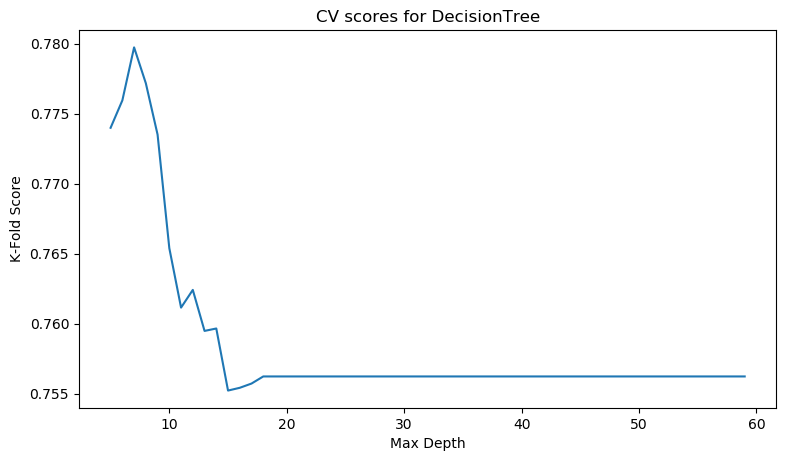

In [28]:
f,ax = plt.subplots(figsize=(9,5))

ax.plot(mDs, scores)
ax.set_title("CV scores for DecisionTree")
ax.set_xlabel("Max Depth")
ax.set_ylabel("K-Fold Score")

In [35]:
#Tune number of neighbours K

nNs = np.arange(2,60)
kNNClassifiers = [skneighb.KNeighborsClassifier(n_neighbors = nN) for nN in nNs]
kNNClassifiers = [kNNClassifier.fit(X_tr,y_tr) for kNNClassifier in kNNClassifiers]

scores = [np.mean(cross_val_score(kNNClassifier, X_tr, y_tr, cv=10, scoring="f1")) for kNNClassifier in kNNClassifiers]

kNNClassifier_bestId = np.argmax(scores)

Text(0,0.5,'K-Fold Score')

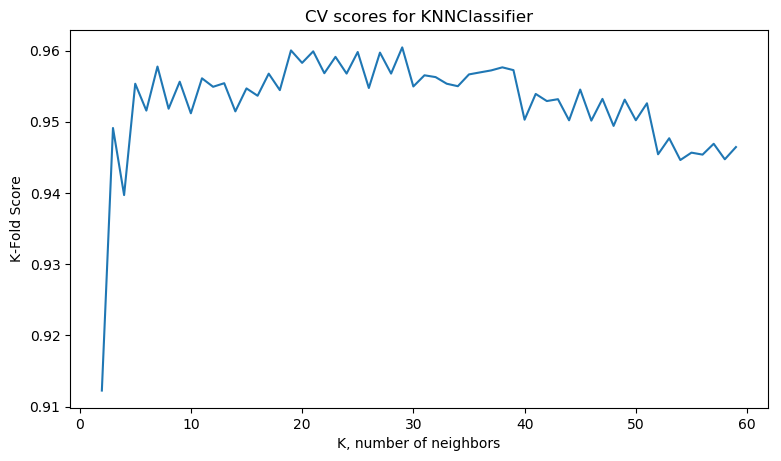

In [36]:
f,ax = plt.subplots(figsize=(9,5))

ax.plot(nNs, scores)
ax.set_title("CV scores for KNNClassifier")
ax.set_xlabel("K, number of neighbors")
ax.set_ylabel("K-Fold Score")

<br/>

### Compare the best models (4 pt.)

In this step you are to plot the [ROC curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) of
the best models on the **test sample**. Then using the ROC-AUC (or any
**other metric** you like) to decide which model is **the best of
the best**.

Try to be creative and not just copy the provided reference tutorials.
Don't worry if the final overall performance metric is not that high.

In [62]:
def GetRates(actives, scores):

    tpr = [0.0]  # true positive rate
    fpr = [0.0]  # false positive rate
    nractives = len(actives)
    nrdecoys = len(scores) - len(actives)

    foundactives = 0.0
    founddecoys = 0.0
    for idx, (id, score) in enumerate(scores):
        if id in actives:
            foundactives += 1.0
        else:
            founddecoys += 1.0

        tpr.append(foundactives / float(nractives))
        fpr.append(founddecoys / float(nrdecoys))

    return tpr, fpr



In [68]:
from sklearn.metrics import roc_curve, auc

logRegClassifier = logRegs[logReg_bestId]
decTreeClassifier = decTrees[decTree_bestId]
kNNClassifier = kNNClassifiers[kNNClassifier_bestId]

yScore_logReg = logRegClassifier.predict(X_test)
yScore_decTree = decTreeClassifier.predict(X_test)
yScore_kNN= kNNClassifier.predict(X_test)

#for each classifier
#logReg
fpr_logReg, tpr_logReg, thr = roc_curve(y_test[:], yScore_logReg[:], drop_intermediate = False)


roc_auc_logReg = auc(fpr_logReg, tpr_logReg)

#decTree
fpr_decTree, tpr_decTree, _ = roc_curve(y_test, yScore_decTree, drop_intermediate = False)
roc_auc_decTree = auc(fpr_decTree, tpr_decTree)

#kNN
fpr_kNN, tpr_kNN, _ = roc_curve(y_test, yScore_kNN, drop_intermediate = False)
roc_auc_kNN = auc(fpr_kNN, tpr_kNN)



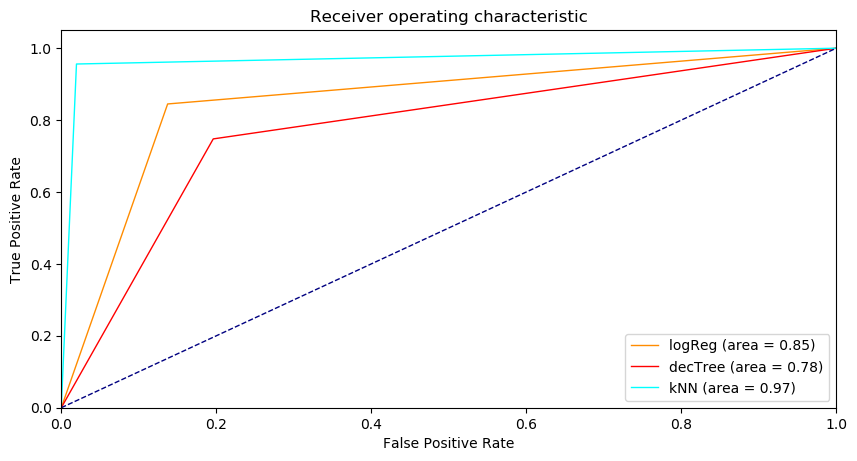

In [69]:
lw=1
f,ax = plt.subplots(figsize=(10,5))

ax.plot(fpr_logReg, tpr_logReg, color='darkorange',
         lw=lw, label='logReg (area = %0.2f)' % roc_auc_logReg)

ax.plot(fpr_decTree, tpr_decTree, color='red',
         lw=lw, label='decTree (area = %0.2f)' % roc_auc_decTree)

ax.plot(fpr_kNN, tpr_kNN, color='cyan',
         lw=lw, label='kNN (area = %0.2f)' % roc_auc_kNN)

ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')#coin flip
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc="lower right")


For some reason the resolution is very poor, but since ROC-curve is non-decreasing as FP-rate approaches 1 we can roughly evaluate the quality of each model. The best one is kNN classifier with K equals

In [70]:
print(nNs[kNNClassifier_bestId])

29
